In [1]:
print("Hello World!")

Hello World!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
%matplotlib inline

/home/gk/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Basic linear regression using gradient descent

Gradient descent has been used as the optimizing function and mean square error is used as cost function. The processes have been modularized for gradient calculation, cost calculation and computing newer weights and model training. Each step is divised into a function.


In [4]:
def gradient_calc(W,X,b,Y):
    w_gradient_sum=0
    b_gradient_sum=0
    for i in range(X.shape[0]):
        w_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])*X[i]
        b_gradient_sum+=((np.dot(W,X[i])+b)-Y[i])
    return w_gradient_sum/len(X),b_gradient_sum/len(X)

In [5]:
def calculate_cost(W,X,b,Y):
    cost=0

    for i in range(X.shape[0]):
        cost+=((np.dot(W,X[i])+b)-Y[i])**2
    return cost/len(X)*2    

In [6]:
def gradient_descent_calc(W,X,b,Y,alpha,error_margin,iterations):
    
    if len(W)==0:
        weights = np.random.rand(X.shape[1])  # Initialize weights with the number of features
    else:
        weights = W

    if len(b) ==0:  
        biases = np.random.rand(1)[0]  
    else:
        biases = b
    cost_history=[]
    m,n=X.shape
    iter_count=0
    while iter_count!=iterations:
        cost_value=calculate_cost(weights,X,biases,Y)
        cost_history.append(cost_value)
        if cost_value<=error_margin:
            print("Error margin reached")
            break
        new_w,new_b=gradient_calc(weights,X,biases,Y)
        weights=weights - alpha * new_w
        biases=biases - alpha * new_b
        iter_count+=1
    
    
    return weights,biases,cost_history

    

As the base steps of gradient descent are completed, testing the created set of functions is needed.


Testing the model using various custom simple data points which are simple in pattern and can be easily inferred to check its accuracy.

In [7]:
# X_train = np.array([[1], [2], [3], [4]])  # 4 training samples
# Y_train = np.array([2, 3, 5, 7])

# X_train = np.array([[1, 2],
#                     [2, 3],
#                     [3, 4],
#                     [4, 5],
#                     [5, 6]])

# # Corresponding target values
# Y_train = np.array([3, 5, 7, 9, 11])

X_train = np.array([[1**2],  # 1, 1, 1
                    [2**2],  # 4, 8, 16
                    [3**2],  # 9, 27, 81
                    [4**2],  # 16, 64, 256
                    [5**2]]) # 25, 125, 625

# Corresponding target values
Y_train = np.array([2, 3, 4, 5, 6])  # You can set any desired pattern

predicted_w,predicted_b,cost_history=gradient_descent_calc([],X_train,[],Y_train,0.00002,0.01,2000)
predicted_x=np.dot(predicted_w,[25**2])+predicted_b
print(f"predicted x is {predicted_x} ")
print(f"line eqn: {predicted_w}x+{predicted_b})")
print(f"final cost is {cost_history[-1]}, predicted w :{predicted_w} and predicted b :{predicted_b}")
# for i in cost_history:
#     print(f"{i}\n")

predicted x is 161.86627736756157 
line eqn: [0.2581902]x+0.49740263911612026)
final cost is 2.4573937748080956, predicted w :[0.2581902] and predicted b :0.49740263911612026


# Logistic regression using gradient descent

While most of the steps are mirrored with the above model created through linear regression regarding the optimizing algorithm and flow of steps in the model, there are certain crucial changes implemented. The sigmoid function is used to compress the results into values between 0 and 1 for probabilistic output and the logistic regression cost function formula differs to the usual mean square error formula used previously on linear regression.


In [8]:
def sigmoid(f_x):
    return 1/(1+np.exp(-(f_x)))

In [9]:
def logistic_cf(W,X,y,b):
    cost=0
    m,n=X.shape
    for i in range(m):
        f_x=np.dot(W,X[i])+b
        g_x=sigmoid(f_x)
        cost+= y[i] * (np.log(g_x)) + (1-y[i]) * (np.log(1-(g_x)))
    cost=(-1/m)*cost
    return cost

In [10]:
def logistic_gradient(W,X,y,b):
    m=X.shape[0]
    gradient_w=0
    gradient_b=0
    for i in range(m):
        f_x=np.dot(W,X[i])+b
        g_x=sigmoid(f_x)
        gradient_w+=(g_x-y[i])*X[i]
        gradient_b+=(g_x-y[i])
    return (1/m)*gradient_w,(1/m)*gradient_b

In [11]:
def logistic_gradient_descent(W,X,y,b,iterations,alpha,error_margin):
    m,n=X.shape
    
    if len(W)==0:
        W=np.random.rand(n)   
    
    if len(b)==0:
        b=np.random.rand(1)[0]
    cost_history=[]
        
    iter_count=0
    while iter_count<iterations:
        current_cost=logistic_cf(W,X,y,b)
        cost_history.append(current_cost)
        if current_cost>error_margin:
            grad_w,grad_b=logistic_gradient(W,X,y,b)
            W=W-alpha*grad_w
            b=b-alpha*grad_b
            iter_count+=1

        else:
            break
    return W,b,cost_history        

Similar types of different simple test cases are used

In [12]:
#hours of study and hours of sleep, value of hours of study must be over 4 for passing 
# X = np.array([
#     [2, 3],    # Sample 1: Will fail (0)
#     [3, 4],    # Sample 2: Will fail (0) 
#     [4, 5],    # Sample 3: Will fail (0)
#     [5, 3],    # Sample 4: Will pass (1)
#     [6, 4],    # Sample 5: Will pass (1)
#     [7, 5],    # Sample 6: Will pass (1)
#     [3, 6],    # Sample 7: Will fail (0)
#     [4, 7],    # Sample 8: Will pass (1)
#     [5, 6],    # Sample 9: Will pass (1)
#     [6, 3]     # Sample 10: Will pass (1)
# ])

# # Labels y
# y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

#############################################################################################
# X_below_boundary = np.column_stack((np.random.uniform(0, 4, 20), np.random.uniform(0, 20, 20)))
# X_above_boundary = np.column_stack((np.random.uniform(4, 8, 20), np.random.uniform(0, 20, 20)))

# # Combine data and labels
# X = np.vstack((X_below_boundary, X_above_boundary))
# y = np.array([0] * 20 + [1] * 20)

# # Shuffle data to ensure it's not ordered
# shuffled_indices = np.random.permutation(len(X))
# X, y = X[shuffled_indices], y[shuffled_indices]
#############################################################################################



X = np.array([[2, 1], [3, 2], [4, 1], [5, 3], [6, 2], [7, 1], 
              [2, 4], [3, 5], [4, 4], [5, 6], [6, 5], [7, 4]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
# y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 


W,b,cost_history=logistic_gradient_descent([],X,y,[],6000,0.1,0.0001)
# for i,j in enumerate(cost_history):
#     print(f' Cost : {j} iteration {i+1}')

In [13]:
test_value=np.array([2,5])
inferred_x=np.dot(W,test_value)+b
pred=sigmoid(inferred_x)
# print(W,b)
if pred>=0.5:
    print("Passes Exam")
else:
    print("Fails exam")

# Visualization of decision boundary when only two features are present 
decision_boundary= [(x_1,(- (b + W[0] * x_1) / W[1])) for x_1 in range(8) ]
db_x=[i for i,j in decision_boundary]
db_y=[j for i,j in decision_boundary]
# print(decision_boundary)

Passes Exam


In [14]:
def pred_logistic_regression(calculated_w,calculated_b,X):
    probability_value=sigmoid(pred_linear_regression(calculated_w,calculated_b,X))
    return True if probability_value>0.5 else False

In [15]:
def pred_linear_regression(calculated_w,calculated_b,X):
    return np.dot(calculated_w,X)+calculated_b

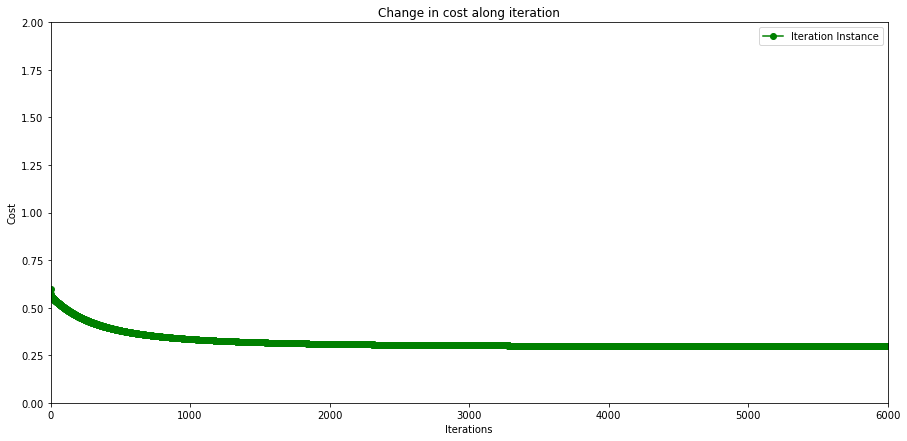

In [16]:
plt.figure(figsize=(15,7)) # must be declared first
plt.plot([i for i in range(len(cost_history))],cost_history,'go-',label='Iteration Instance')
plt.title('Change in cost along iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='best')
plt.xlim(0, 6000) #value limits 
plt.ylim(0, 2) #value limits

plt.show()

(0.0, 20.0)

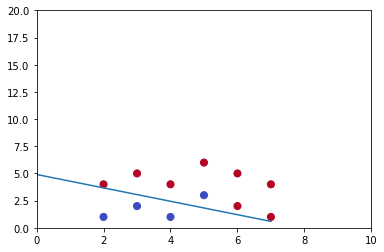

In [17]:
np
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
plt.plot(db_x,db_y)
plt.xlim(0, 10) #value limits 
plt.ylim(0, 20) #value limits


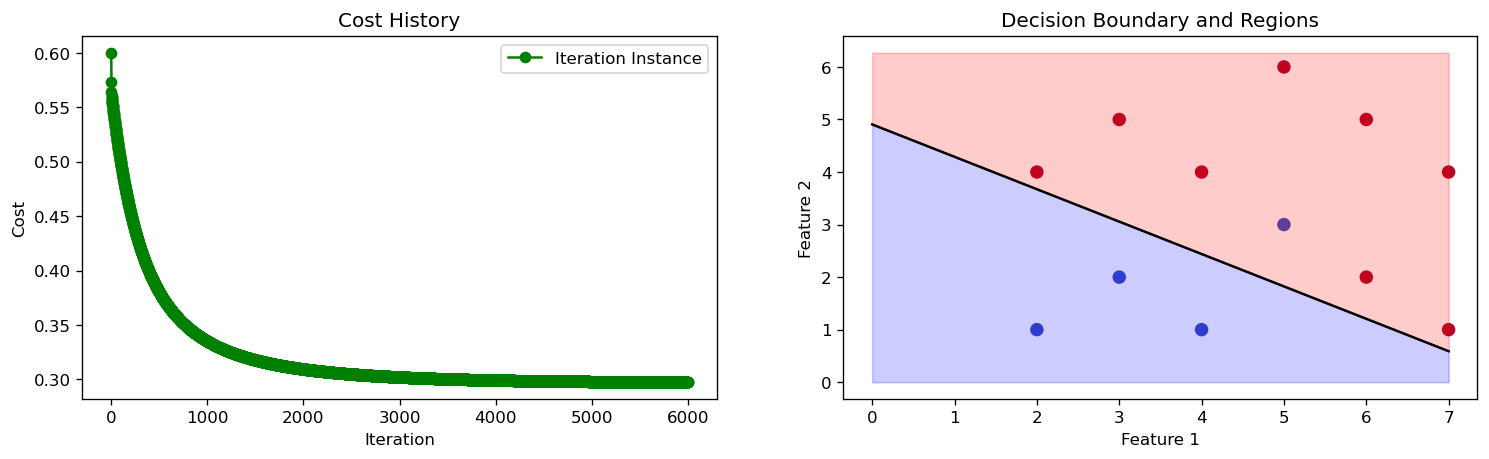

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4), dpi=120)

# Plot the cost history (iterations vs cost)
ax1.plot([i for i in range(len(cost_history))], cost_history, 'go-', label='Iteration Instance')
ax1.set_title('Cost History')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.legend()

# Scatter plot of data points and decision boundary
ax2.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, label='Data Points')

# Plot decision boundary
db_x = np.array(db_x)  # X coordinates of the decision boundary
db_y = np.array(db_y)  # Y coordinates of the decision boundary
ax2.plot(db_x, db_y, 'k-', label='Decision Boundary')

# Fill regions based on the decision boundary
# Above the boundary -> Class 1 Region
ax2.fill_between(db_x, db_y, y2=ax2.get_ylim()[1], color='red', alpha=0.2, label='Class 1 Region')
#fill from y1 to y2
# Below the boundary -> Class 2 Region
ax2.fill_between(db_x, db_y,   color='blue', alpha=0.2, label='Class 2 Region')
# Configure plot aesthetics
ax2.set_title('Decision Boundary and Regions')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
# ax1.xlim(0,5000)
# ax1.ylim(0,2)
# ax1. 
# plt.tight_layout()
plt.show()
